#### Model Order selection:
#### $BIC_{k}=n_{}log(SS_{\epsilon})+k_{}log(n)$
#### where BIC is Bayersian Information Crieterion and
#### $n$ is the number of observations in the dataset.
#### $k$ is the degree of the polynomial model (the number of polynomial terms used in the model).
#### $SS_{\epsilon}$ is the sum of squared residuals (the difference between the predicted and actual values of the dependent variable).

In [41]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df=pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
df=df[['lstat','medv']]

<Axes: xlabel='medv', ylabel='lstat'>

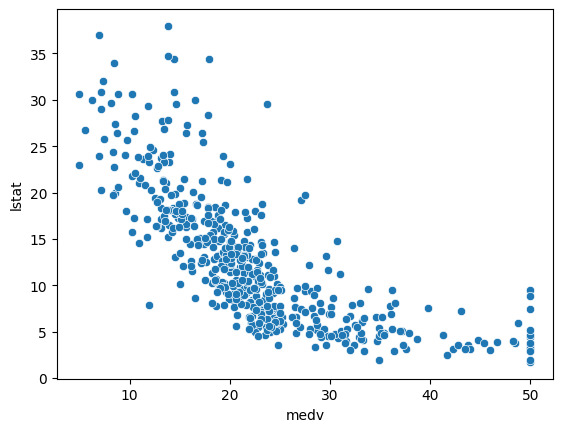

In [44]:
sns.scatterplot(x=df['medv'],y=df['lstat'],data=df)

In [45]:
X=df['lstat']
y=df['medv']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [73]:
X_train,X_test,y_train,y_test=pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(y_train),pd.DataFrame(y_test)

In [48]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [49]:
pred1=linear.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [51]:
mean_squared_error(y_test,pred1)

35.50838282425953

In [84]:
np.sqrt(mean_squared_error(y_test,pred1))

5.958891073367555

In [52]:
mean_absolute_error(y_test,pred1)

4.5560507624182005

In [53]:
r2_score(y_test,pred1)

0.4929340114233606

In [103]:
b=linear.intercept_
m=linear.coef_

In [107]:
b

array([35.18640571])

In [108]:
m

array([[-0.98123532]])

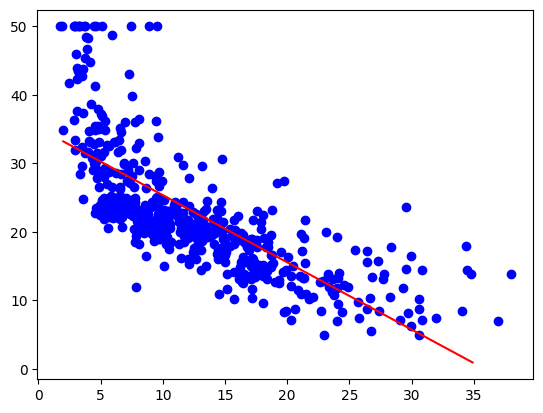

In [120]:
x_axis=np.arange(2,35,0.1)
response1=m[0][0]*x_axis+b
plt.scatter(df['lstat'],df['medv'],color='b')
plt.plot(x_axis,response1,color='r')

#### This model has a low r2 score when we used linear regression

#### Implementing polynomial regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_train_poly

array([[  1.    ,   4.82  ,  23.2324],
       [  1.    ,  15.02  , 225.6004],
       [  1.    ,   3.76  ,  14.1376],
       ...,
       [  1.    ,   5.99  ,  35.8801],
       [  1.    ,  23.27  , 541.4929],
       [  1.    ,  10.63  , 112.9969]])

In [75]:
X_train

,lstat
182,4.82
155,15.02
280,3.76
126,27.26
329,7.34
...,...
106,18.66
270,13.00
348,5.99
435,23.27


In [76]:
X_test

,lstat
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27
...,...
418,20.62
117,10.30
42,5.81
322,7.70


In [77]:
X_test_poly=poly.fit_transform(X_test)
X_test_poly

array([[1.0000000e+00, 9.0400000e+00, 8.1721600e+01],
       [1.0000000e+00, 3.5300000e+00, 1.2460900e+01],
       [1.0000000e+00, 1.8070000e+01, 3.2652490e+02],
       [1.0000000e+00, 5.5200000e+00, 3.0470400e+01],
       [1.0000000e+00, 1.7270000e+01, 2.9825290e+02],
       [1.0000000e+00, 1.1970000e+01, 1.4328090e+02],
       [1.0000000e+00, 1.8330000e+01, 3.3598890e+02],
       [1.0000000e+00, 2.4160000e+01, 5.8370560e+02],
       [1.0000000e+00, 1.2870000e+01, 1.6563690e+02],
       [1.0000000e+00, 1.4330000e+01, 2.0534890e+02],
       [1.0000000e+00, 1.7920000e+01, 3.2112640e+02],
       [1.0000000e+00, 1.7100000e+01, 2.9241000e+02],
       [1.0000000e+00, 3.6980000e+01, 1.3675204e+03],
       [1.0000000e+00, 1.2340000e+01, 1.5227560e+02],
       [1.0000000e+00, 1.1740000e+01, 1.3782760e+02],
       [1.0000000e+00, 1.1660000e+01, 1.3595560e+02],
       [1.0000000e+00, 1.7580000e+01, 3.0905640e+02],
       [1.0000000e+00, 3.0620000e+01, 9.3758440e+02],
       [1.0000000e+00, 2.970

In [78]:
poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [79]:
poly_model.coef_

array([[ 0.        , -2.46332438,  0.0468934 ]])

In [80]:
pred_poly=poly_model.predict(X_test_poly)

In [81]:
r2_score(y_test,pred_poly)

0.5555828390062716

In [83]:
np.sqrt(mean_squared_error(y_test,pred_poly))

5.578643596371643

In [85]:
mean_absolute_error(y_test,pred_poly)

4.1827653936822955

In [91]:
coefficient=poly_model.coef_
intercept=poly_model.intercept_

In [95]:
coefficient

array([[ 0.        , -2.46332438,  0.0468934 ]])

In [100]:
coefficient[0]

array([ 0.        , -2.46332438,  0.0468934 ])

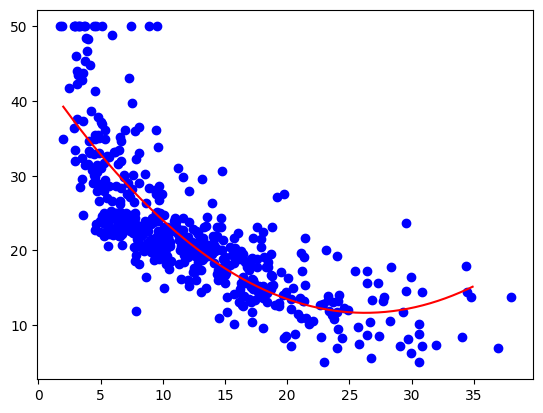

In [116]:
x_axis=np.arange(2,35,0.1)
response=intercept+(coefficient[0][1]*x_axis)+(coefficient[0][2]*(x_axis**2))
plt.scatter(df['lstat'],df['medv'],color='b')
plt.plot(x_axis,response,color='r')

In [127]:
poly1=PolynomialFeatures(degree=4)
X_train_poly1=poly1.fit_transform(X_train)
X_test_poly1=poly1.fit_transform(X_test)
poly_model.fit(X_train_poly1,y_train)

LinearRegression()

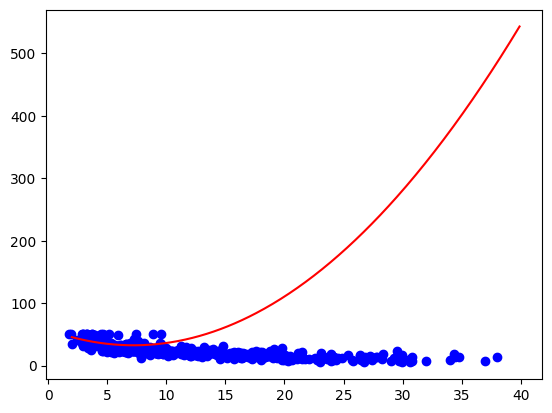

In [128]:
coefficient=poly_model.coef_
intercept=poly_model.intercept_
x_axis=np.arange(2,40,0.1)
response=intercept+(coefficient[0][1]*x_axis)+(coefficient[0][2]*(x_axis**2))
plt.scatter(df['lstat'],df['medv'],color='b')
plt.plot(x_axis,response,color='r')

In [141]:
orders = list(range(1, 6))
BICs = []
# Fit polynomial regression models and calculate BICs for each order
for order in orders:
    poly = PolynomialFeatures(degree=order)
    X_poly = poly.fit_transform(X_train)
    model = sm.OLS(y_train, X_poly).fit()# fits an ordinary least squares (OLS) regression model using the sm.OLS()
    bic = model.bic
    BICs.append(bic)

In [142]:
BICs

[2481.911623022106,
 2385.1839727249885,
 2374.1970594112295,
 2364.03985830658,
 2362.1386602295024]

In [143]:
best_order = np.argmin(BICs) + 1
print("Best order:", best_order)

Best order: 5


In [151]:
poly = PolynomialFeatures(degree=5)
Xnew_train=poly.fit_transform(X_train)
Xnew_test=poly.fit_transform(X_test)
poly_model=LinearRegression()
poly_model.fit(Xnew_train,y_train)

LinearRegression()

In [152]:
poly5_pred=poly_model.predict(Xnew_test)

In [153]:
r2_score(y_test,poly5_pred)

0.6221234420055586

In [156]:
np.sqrt(mean_squared_error(y_test,poly5_pred))#the polynomial regression model of order 

5.1440855368339635

In [154]:
coefficient=poly_model.coef_
coefficient

array([[ 0.00000000e+00, -1.11048263e+01,  1.14003754e+00,
        -6.00419461e-02,  1.49783711e-03, -1.39721246e-05]])

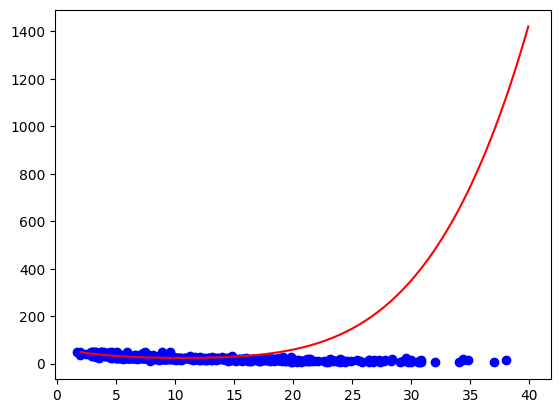

In [155]:
coefficient=poly_model.coef_
intercept=poly_model.intercept_
x_axis=np.arange(2,40,0.1)
response=intercept+(coefficient[0][1]*x_axis)+(coefficient[0][2]*(x_axis**2))+(coefficient[0][3]*(x_axis**3))+(coefficient[0][4]*(x_axis**4))
plt.scatter(df['lstat'],df['medv'],color='b')
plt.plot(x_axis,response,color='r')

### Observations
### ***************
#### When we use Bayersian Information Criterion to find the best order in our polynomial regression model, we improved out models performance